# EDA 

Author: hshin337@gatech.edu  
Date: 1/31/2026  




## Findings

1. Use Ploymaket data  
    - Crypto Market interest indicator 
    - Before the year 2020, value set as 0.5

2. Incomplete category need to be reviewed  
    - `bitcoin|btc|crypto|eth|bsv|bch|ada|xrp` for market category classification
    - Before Crypto category count 340
    - After Crypto category count 48,752

3. How to interpret data as an indicator
    - Sentiment score [0, 1]
    - What else?



In [72]:
from pathlib import Path
import polars as pl
import seaborn as sns
import matplotlib.pyplot as plt
from eda_starter_template import (
    load_bitcoin_data, 
    load_polymarket_data, 
    analyze_btc_metrics, 
    analyze_polymarket_summary, 
    plot_btc_price, 
    plot_polymarket_volume
)

# --- Configuration ---
# Robustly determine the project root directory
SCRIPT_DIR = Path().resolve()
PROJECT_ROOT = SCRIPT_DIR.parent
DATA_DIR = PROJECT_ROOT / "data"
PLOTS_DIR = SCRIPT_DIR / "plots"
COINMETRICS_PATH = DATA_DIR / "Coin Metrics" / "coinmetrics_btc.csv"
POLYMARKET_DIR = DATA_DIR / "Polymarket"

print(f"Project root directory: {PROJECT_ROOT}")

Project root directory: C:\Users\hyuns\workspace\GT-MSA-Spring-2026-Team-09


## Ploymarket

In [73]:
dict_ploymarket = load_polymarket_data(POLYMARKET_DIR)
df_markets = dict_ploymarket['markets']
df_markets_summary = dict_ploymarket['summary']
df_markets_odds = dict_ploymarket['odds']
dict_ploymarket

Loading Polymarket data from C:\Users\hyuns\workspace\GT-MSA-Spring-2026-Team-09\data\Polymarket...
[Memory] Before loading Polymarket data: 439.77 MB
Loaded 78321 markets.
Loaded 2143181 odds history records.
Loaded 78321 summary records.
[Memory] After loading Polymarket data: 595.30 MB (Δ 155.54 MB)


{'markets': shape: (78_321, 10)
 ┌───────────┬────────────┬────────────┬────────────┬───┬────────┬────────┬────────────┬────────────┐
 │ market_id ┆ question   ┆ slug       ┆ event_slug ┆ … ┆ active ┆ closed ┆ created_at ┆ end_date   │
 │ ---       ┆ ---        ┆ ---        ┆ ---        ┆   ┆ ---    ┆ ---    ┆ ---        ┆ ---        │
 │ str       ┆ str        ┆ str        ┆ str        ┆   ┆ bool   ┆ bool   ┆ datetime[μ ┆ datetime[μ │
 │           ┆            ┆            ┆            ┆   ┆        ┆        ┆ s]         ┆ s]         │
 ╞═══════════╪════════════╪════════════╪════════════╪═══╪════════╪════════╪════════════╪════════════╡
 │ 242851    ┆ Will       ┆ will-bongb ┆ will-bongb ┆ … ┆ true   ┆ true   ┆ 2022-04-05 ┆ 2022-05-09 │
 │           ┆ Bongbong   ┆ ong-marcos ┆ ong-marcos ┆   ┆        ┆        ┆ 20:37:30   ┆ 00:00:00   │
 │           ┆ Marcos be  ┆ -be-electe ┆ -be-electe ┆   ┆        ┆        ┆            ┆            │
 │           ┆ electe…    ┆ …          ┆ …        

In [74]:
print(df_markets.columns, "\n\n",df_markets.dtypes)


['market_id', 'question', 'slug', 'event_slug', 'category', 'volume', 'active', 'closed', 'created_at', 'end_date'] 

 [String, String, String, String, String, Float64, Boolean, Boolean, Datetime(time_unit='us', time_zone=None), Datetime(time_unit='us', time_zone=None)]


In [ ]:
# df_markets.to_pandas()
pd_df_markets = df_markets.to_pandas()  
print('Before Crypto category count', pd_df_markets['category'].value_counts()['Crypto'])
# pd_df_markets[pd_df_markets['category'] == 'Crypto'].count()
# pd_df_markets.groupby('category').size().plot(kind='barh', title='Number of Markets by Category')
# pd_df_markets[pd_df_markets['category']=='']['question']
pd_df_markets.loc[
    (pd_df_markets['category'].str.strip() == '') &
    (pd_df_markets['question'].str.lower().str.contains(r'bitcoin|btc|crypto|eth|bsv|bch|ada|xrp', case=False, regex=True)),
    'category'
] = 'Crypto'

print('After Crypto category count', pd_df_markets['category'].value_counts()['Crypto'])

Before Crypto category count 340
After Crypto category count 48752


Text(0.5, 0, 'Number of Markets')

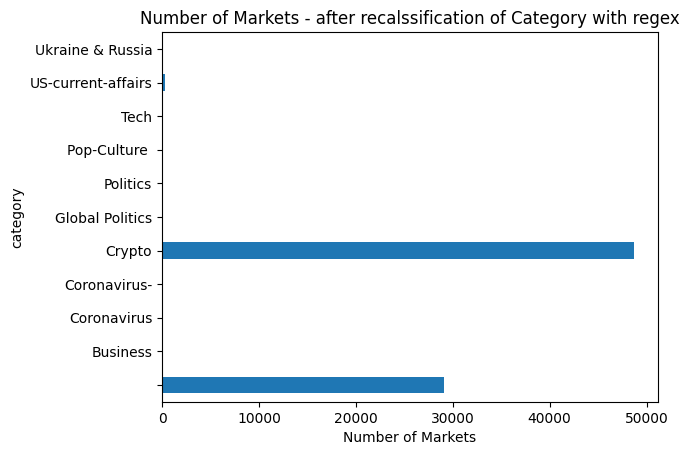

In [69]:
pd_df_markets.groupby('category').size().plot(kind='barh', title='Number of Markets - after recalssification of Category with regex')
plt.xlabel('Number of Markets')

In [79]:
pd_crypto_markets = pd_df_markets[pd_df_markets['category'] == 'Crypto']
pd_crypto_markets

,market_id,question,slug,event_slug,category,volume,active,closed,created_at,end_date
3,243183,"Will $ETH be above $3,000 on April 20, 2022?",will-eth-be-above-3000-on-april-20-2022,will-eth-be-above-3000-on-april-20-2022,Crypto,974114.26,True,True,2022-04-12 16:51:10,2022-04-20
9,243993,Will Bitcoin or Ethereum perform better in May...,will-bitcoin-or-ethereum-perform-better-in-may...,btc-vs-eth-performance-2022,Crypto,4941.31,True,True,2022-05-01 15:39:16,2022-06-01
11,244943,"Will $UST be above $0.10 on May 23, 2022?",will-ust-be-above-0pt10-on-may-23-2022,will-ust-be-above-0pt10-on-may-23-2022,Crypto,13367.39,True,True,2022-05-17 19:31:14,2022-05-23
12,245033,"Will $ETH be above $2,000 on May 27?",will-eth-be-above-2000-on-may-27,will-eth-be-above-2000-on-may-27,Crypto,801754.44,True,True,2022-05-19 15:55:11,2022-05-27
16,246494,Will Solana ($SOL) hit $35 or $50 first?,will-solana-sol-hit-35-or-50-first,will-solana-sol-hit-35-or-50-first,Crypto,3060.73,True,True,2022-06-06 20:12:06,2023-01-01
...,...,...,...,...,...,...,...,...,...,...
78309,242594,Will Unslashed Insurance payout for an Anchor ...,will-unslashed-insurance-payout-for-an-anchor-...,will-unslashed-insurance-payout-for-an-anchor-...,Crypto,18001.70,True,True,2022-03-28 21:42:48,2022-06-30
78311,242601,"Will $ETH be above $3,400 on April 8th, 2022?",will-eth-be-above-3400-on-april-8th-2022,will-eth-be-above-3400-on-april-8th-2022,Crypto,559956.52,True,True,2022-03-29 12:15:12,2022-04-08
78313,242604,Will the price of Polygon (MATIC) be above $1....,will-the-price-of-polygon-matic-be-above-1pt75...,will-the-price-of-polygon-matic-be-above-1pt75...,Crypto,5405.99,True,True,2022-03-29 12:39:05,2022-04-08
78314,242618,Will the Ronin Network hacker return 90% or mo...,will-the-ronin-network-hacker-return-90-or-mor...,will-the-ronin-network-hacker-return-90-or-mor...,Crypto,7445.53,True,True,2022-03-29 22:48:53,2022-04-14


In [84]:
# get min and max dates of created_at
print(pd_crypto_markets['created_at'].min(), pd_crypto_markets['created_at'].max())

2020-10-02 20:00:04 2025-12-10 05:32:21


C:\Users\hyuns\AppData\Local\Temp\ipykernel_6692\3944413918.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pd_crypto_markets['created_date'] = pd_crypto_markets['created_at'].dt.date


<Axes: title={'center': 'Number of Crypto Markets Created Over Time'}, xlabel='created_date'>

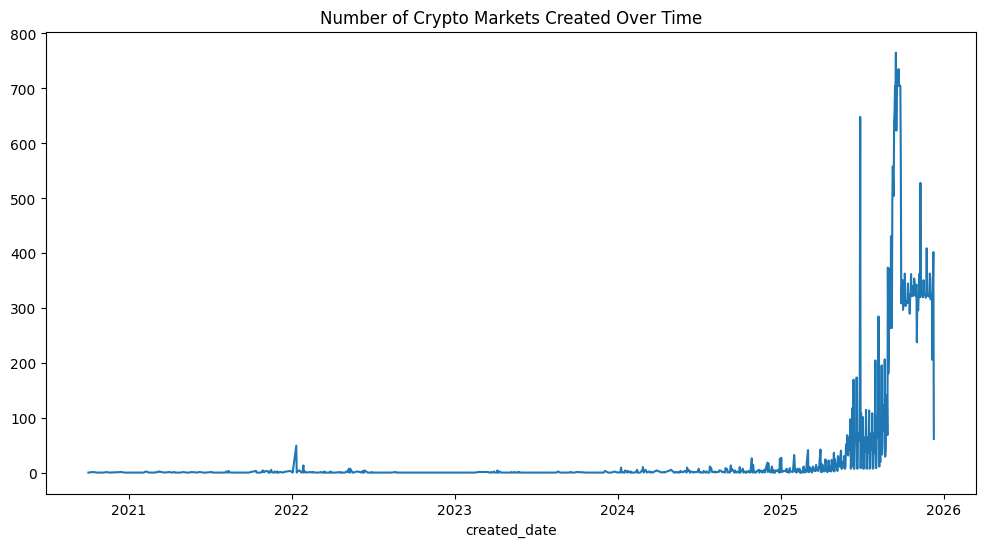

In [82]:
# number of market created per day
pd_crypto_markets['created_date'] = pd_crypto_markets['created_at'].dt.date
plt.figure(figsize=(12, 6))
pd_crypto_markets.groupby('created_date').size().plot(kind='line', title='Number of Crypto Markets Created Over Time')

In [71]:
print(df_markets_summary.columns, "\n\n",df_markets_summary.dtypes)

['market_id', 'question', 'slug', 'volume', 'active', 'token_count', 'trade_count', 'first_trade', 'last_trade'] 

 [String, String, String, Float64, Boolean, Int64, Int64, Datetime(time_unit='us', time_zone=None), Datetime(time_unit='us', time_zone=None)]


In [ ]:
df_markets_summary

In [ ]:
df_markets_odds

In [ ]:
analyze_polymarket_summary(dict_ploymarket)

In [ ]:
# import os
# import pandas as pd

# # ---------------------------------------------------------
# # 1. Load all parquet files
# # ---------------------------------------------------------

# markets = pd.read_parquet(os.path.join(POLYMARKET_DIR, "finance_politics_markets.parquet"))
# tokens = pd.read_parquet(os.path.join(POLYMARKET_DIR,"finance_politics_tokens.parquet"))
# trades = pd.read_parquet(os.path.join(POLYMARKET_DIR,"finance_politics_trades.parquet"))
# odds = pd.read_parquet(os.path.join(POLYMARKET_DIR,"finance_politics_odds_history.parquet"))
# event_stats = pd.read_parquet(os.path.join(POLYMARKET_DIR,"finance_politics_event_stats.parquet"))
# summary = pd.read_parquet(os.path.join(POLYMARKET_DIR,"finance_politics_summary.parquet"))

# # Ensure timestamps are datetime 
# for df in [trades, odds, markets, summary]:
#     for col in df.columns:
#         if "timestamp" in col or "date" in col:
#             df[col] = pd.to_datetime(df[col])
import os
import pandas as pd

# ---------------------------------------------------------
# 1. Load all parquet files
# ---------------------------------------------------------

markets = pd.read_parquet(os.path.join(POLYMARKET_DIR, "finance_politics_markets.parquet"))
tokens = pd.read_parquet(os.path.join(POLYMARKET_DIR,"finance_politics_tokens.parquet"))
trades = pd.read_parquet(os.path.join(POLYMARKET_DIR,"finance_politics_trades.parquet"))
odds = pd.read_parquet(os.path.join(POLYMARKET_DIR,"finance_politics_odds_history.parquet"))
event_stats = pd.read_parquet(os.path.join(POLYMARKET_DIR,"finance_politics_event_stats.parquet"))
summary = pd.read_parquet(os.path.join(POLYMARKET_DIR,"finance_politics_summary.parquet"))

# ---------------------------------------------------------
# 2. Ensure timestamps are datetime
# ---------------------------------------------------------

for df in [trades, odds, markets, summary]:
    for col in df.columns:
        if "timestamp" in col or "date" in col:
            df[col] = pd.to_datetime(df[col])

# ---------------------------------------------------------
# 3. Filter rows on or after 2025-12-01
# ---------------------------------------------------------

cutoff = pd.Timestamp("2025-12-01")

for name, df in {
    "trades": trades,
    "odds": odds,
    "markets": markets,
    "summary": summary
}.items():
    datetime_cols = [c for c in df.columns if "timestamp" in c or "date" in c]
    if datetime_cols:
        col = datetime_cols[0]  # use first datetime column
        df = df[df[col] >= cutoff]
        globals()[name] = df  # update original variable

# ---------------------------------------------------------
# 2. Merge markets ↔ tokens (market metadata + outcomes)
# ---------------------------------------------------------

market_tokens = markets.merge(tokens, on="market_id", how="left")
# market_tokens
# ---------------------------------------------------------
# 3. Merge odds history (time-series probabilities)
# ---------------------------------------------------------

odds_full = odds.merge(market_tokens, on=["market_id", "token_id"], how="left")
# odds_full
# ---------------------------------------------------------
# 4. Aggregate trades to daily level (volume, buy/sell imbalance)
# ---------------------------------------------------------

trades["date"] = trades["timestamp"].dt.date

daily_trades = (
    trades.groupby(["market_id", "token_id", "date"])
    .agg(
        daily_volume_usd=("size", "sum"),
        avg_trade_price=("price", "mean"),
        buy_volume=("size", lambda x: trades.loc[x.index][trades["side"]=="BUY"]["size"].sum()),
        sell_volume=("size", lambda x: trades.loc[x.index][trades["side"]=="SELL"]["size"].sum()),
        trade_count=("trade_id", "count")
    )
    .reset_index()
)

daily_trades["date"] = pd.to_datetime(daily_trades["date"])
# daily_trades

# ---------------------------------------------------------
# 5. Merge odds history with daily trades
# ---------------------------------------------------------

odds_full["date"] = odds_full["timestamp"].dt.date
odds_full["date"] = pd.to_datetime(odds_full["date"])

odds_trades = odds_full.merge(
    daily_trades,
    on=["market_id", "token_id", "date"],
    how="left"
)


# ---------------------------------------------------------
# 6. Add event-level metadata (event_stats)
# ---------------------------------------------------------

odds_trades = odds_trades.merge(
    event_stats,
    on="event_slug",
    how="left",
    suffixes=("", "_event")
)


# ---------------------------------------------------------
# 7. Add summary-level metadata (summary)
# ---------------------------------------------------------

odds_trades = odds_trades.merge(
    summary[[
        "market_id", "token_count", "trade_count",
        "first_trade", "last_trade"
    ]],
    on="market_id",
    how="left"
)


# ---------------------------------------------------------
# 8. Final cleanup: sort & set index
# ---------------------------------------------------------

odds_trades = odds_trades.sort_values(["date", "market_id", "token_id"])
odds_trades = odds_trades.reset_index(drop=True)


# ---------------------------------------------------------
# 9. Final master table
# ---------------------------------------------------------

polymarket_master = odds_trades.copy()

print(polymarket_master.head())
print(polymarket_master.columns)


In [ ]:
plot_polymarket_volume(df_markets)


![df_markets](./plots/polymarket_volume_by_category.png)

In [ ]:
print("end of EDA")